In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
import csv
from sklearn.model_selection import train_test_split

In [4]:
# Nombre del archivo CSV
path_csv = '../data/csv/history.csv'

# Listas para almacenar los valores de las columnas 's' y 'reward'
sy_values = []
sx_values = []
a_values = []
sy1_values = []
sx1_values = []
reward_values = []

In [5]:
# Leer el archivo CSV
with open(path_csv, 'r') as csv_file:
    csv_reader = csv.reader(csv_file)
    next(csv_reader)  # Quitar la primera fila donde están los nombres de las columnas

    for row in csv_reader:
        step, y, x, action, next_y, next_x, reward, done =  row
        sy_values.append(float(y))
        sx_values.append(float(x))
        a_values.append(float(action))
        sy1_values.append(float(next_y))
        sx1_values.append(float(next_x))
        reward_values.append(float(reward))

In [6]:
# Convertir las listas en NumPy arrays
sy_array = np.array(sy_values)
sx_array = np.array(sx_values)
a_array = np.array(a_values)
sy1_array = np.array(sy1_values)
sx1_array = np.array(sx1_values)
reward_array = np.array(reward_values)

In [7]:
input_data1 = np.column_stack((sy_array, sx_array, a_array))
target_data1 = np.column_stack((sy1_array, sx1_array))
input_data2 = input_data1
target_data2 = reward_array

In [8]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(input_data1, target_data1, test_size=0.2, random_state=42)
X_train2, X_test2, y_train2, y_test2 = train_test_split(input_data2, target_data2, test_size=0.2, random_state=42)

In [33]:
class NeuralNetwork(nn.Module):
    def __init__(self, input_size, output_size):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.fc2 = nn.Linear(64, output_size)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [34]:
# Create an instance of the model
model1 = NeuralNetwork(3, 2)
model2 = NeuralNetwork(3, 1)

# Define the loss function and optimizer
criterion = nn.MSELoss()
optimizer1 = optim.Adam(model1.parameters())
optimizer2 = optim.Adam(model2.parameters())

In [44]:
# Convert NumPy arrays to PyTorch tensors
X_train_tensor1 = torch.tensor(X_train1, dtype=torch.float32)
y_train_tensor1 = torch.tensor(y_train1, dtype=torch.float32)
X_test_tensor1 = torch.tensor(X_test1, dtype=torch.float32)
y_test_tensor1 = torch.tensor(y_test1, dtype=torch.float32)

X_train_tensor2 = torch.tensor(X_train2, dtype=torch.float32)
y_train_tensor2 = torch.tensor(y_train2, dtype=torch.float32).view(-1, 1)  # Reshape the target tensor
X_test_tensor2 = torch.tensor(X_test2, dtype=torch.float32)
y_test_tensor2 = torch.tensor(y_test2, dtype=torch.float32).view(-1, 1)  # Reshape the target tensor

In [36]:
num_epochs1 = 2000
losses1 = []

for epoch in range(num_epochs1):
    # Forward pass
    outputs = model1(X_train_tensor1)
    loss = criterion(outputs, y_train_tensor1)
    
    # Backpropagation and optimization
    optimizer1.zero_grad()
    loss.backward()
    optimizer1.step()
    
    losses1.append(loss.item())

print("Modelo entrenado!")

Modelo entrenado!


In [37]:
# Evaluate the model on the test data
with torch.no_grad():
    test_outputs = model1(X_test_tensor1)
    test_loss = criterion(test_outputs, y_test_tensor1)
    print(f'Test loss: {test_loss.item()}')

Test loss: 0.021237071603536606


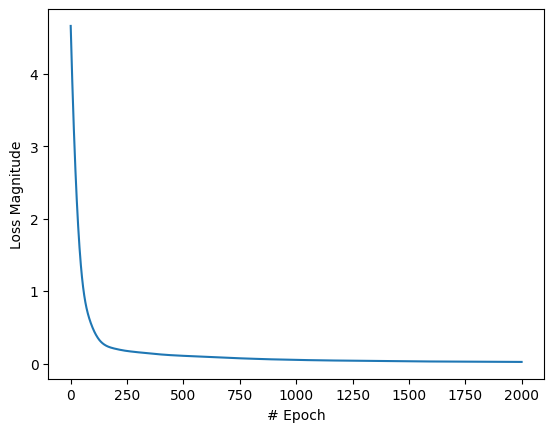

In [38]:
# Plot the training loss
plt.xlabel("# Epoch")
plt.ylabel("Loss Magnitude")
plt.plot(losses1)

In [41]:
# Perform predictions
for k in range(2):
    for i in range(4):
        test_input = torch.tensor([[4.0, float(k), float(i)]], dtype=torch.float32)
        resultado = model1(test_input)
        resultado = resultado.detach().numpy()
        print("El vector de entrada [y,x,a] es ", [4, k, i])
        print("El resultado es " + str(resultado) + "-> Redondeo:" + str(round(resultado[0][0]))+ ',' + str(round(resultado[0][1])))


El vector de entrada [y,x,a] es  [4, 0, 0]
El resultado es [[ 2.911556   -0.02245523]]-> Redondeo:3,0
El vector de entrada [y,x,a] es  [4, 0, 1]
El resultado es [[ 4.176043   -0.02518628]]-> Redondeo:4,0
El vector de entrada [y,x,a] es  [4, 0, 2]
El resultado es [[4.0015140e+00 2.8855875e-03]]-> Redondeo:4,0
El vector de entrada [y,x,a] es  [4, 0, 3]
El resultado es [[3.9981241 0.9639875]]-> Redondeo:4,1
El vector de entrada [y,x,a] es  [4, 1, 0]
El resultado es [[3.0028696 1.027564 ]]-> Redondeo:3,1
El vector de entrada [y,x,a] es  [4, 1, 1]
El resultado es [[4.205362   0.84361756]]-> Redondeo:4,1
El vector de entrada [y,x,a] es  [4, 1, 2]
El resultado es [[3.9666758  0.04432862]]-> Redondeo:4,0
El vector de entrada [y,x,a] es  [4, 1, 3]
El resultado es [[4.0226016 1.0206707]]-> Redondeo:4,1


In [16]:
torch.save(model1.state_dict(), '../data/models/modelo_entorno.pt')
#El nombre empieza con _ para no sobreescribir los modelos ya creados

Red para modelar la función de recompensa:

In [45]:
num_epochs2 = 2000
losses2 = []

for epoch in range(num_epochs2):
    # Forward pass
    outputs = model2(X_train_tensor2)
    loss = criterion(outputs, y_train_tensor2)
    
    # Backpropagation and optimization
    optimizer2.zero_grad()
    loss.backward()
    optimizer2.step()
    
    losses2.append(loss.item())

print("Modelo entrenado!")

Modelo entrenado!


In [46]:
# Evaluate the model on the test data
with torch.no_grad():
    test_outputs = model2(X_test_tensor2)
    test_loss = criterion(test_outputs, y_test_tensor2)
    print(f'Test loss: {test_loss.item()}')

Test loss: 5.304105798131786e-05


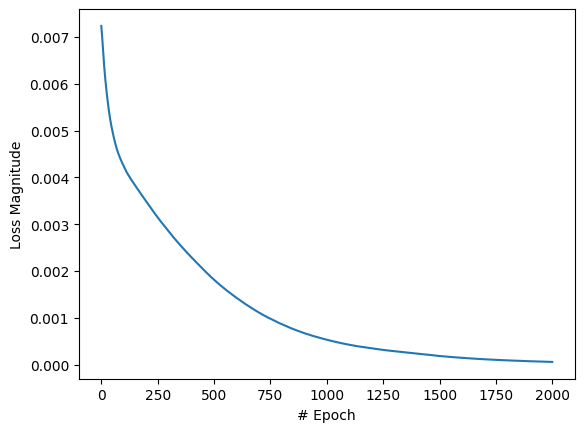

In [47]:
# Plot the training loss
plt.xlabel("# Epoch")
plt.ylabel("Loss Magnitude")
plt.plot(losses2)

In [57]:
# Perform predictions
for k in range(2,5):
    for i in range(4):
        test_input = torch.tensor([[0.0, float(k), float(i)]], dtype=torch.float32)
        resultado = model2(test_input)
        resultado = resultado.detach().numpy()
        print("El vector de entrada [y,x,a] es ", [0, k, i])
        print("El resultado es " + str(resultado[0][0]) + " \t-> Redondeo: " + str(round(resultado[0][0])))


El vector de entrada [y,x,a] es  [0, 2, 0]
El resultado es -0.20811355 	-> Redondeo: 0
El vector de entrada [y,x,a] es  [0, 2, 1]
El resultado es -0.23302332 	-> Redondeo: 0
El vector de entrada [y,x,a] es  [0, 2, 2]
El resultado es 0.22133312 	-> Redondeo: 0
El vector de entrada [y,x,a] es  [0, 2, 3]
El resultado es 0.46096224 	-> Redondeo: 0
El vector de entrada [y,x,a] es  [0, 3, 0]
El resultado es 0.033752676 	-> Redondeo: 0
El vector de entrada [y,x,a] es  [0, 3, 1]
El resultado es -0.04904776 	-> Redondeo: 0
El vector de entrada [y,x,a] es  [0, 3, 2]
El resultado es 0.07411958 	-> Redondeo: 0
El vector de entrada [y,x,a] es  [0, 3, 3]
El resultado es 0.9468656 	-> Redondeo: 1
El vector de entrada [y,x,a] es  [0, 4, 0]
El resultado es 0.7970932 	-> Redondeo: 1
El vector de entrada [y,x,a] es  [0, 4, 1]
El resultado es 0.5440746 	-> Redondeo: 1
El vector de entrada [y,x,a] es  [0, 4, 2]
El resultado es 0.4853521 	-> Redondeo: 0
El vector de entrada [y,x,a] es  [0, 4, 3]
El resultad

In [21]:
torch.save(model2.state_dict(), '../data/models/modelo_entorno.pt')
#El nombre empieza con _ para no sobreescribir los modelos ya creados